In [3]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 4.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
!nvidia-smi

Sat Jun 11 12:24:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import tensorflow as tf
import keras
from numpy import array
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import json
import datetime
import os
from datetime import datetime

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/종합설계과제/df1.csv', encoding='utf-8')

In [4]:
df1

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.00,329.000000,80272.0,360.000000,122787.50,1281.000000,3.0,11000.000000,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.50,478.000000,1699653.7,382.000000,2315079.00,1235.000000,699.0,4464.000000,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.00,442.000000,1423482.3,422.000000,2092960.10,1213.000000,1112.6,4342.000000,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2021-01-27,NaN,606056.20,600.500097,1466937.7,401.573631,1296784.45,1537.640477,78813.2,17073.397477,...,37464.0,4639.0,196522.0,3249.0,223397.1,3831.0,0.0,0.0,32003.8,12763.0
1841,2021-01-28,NaN,1054018.25,521.668105,1378192.0,409.739775,1420173.10,1557.361634,585.0,17141.316239,...,36102.0,4321.0,171803.0,3351.0,156584.7,3861.0,0.0,0.0,46450.0,13008.0
1842,2021-01-29,NaN,1035047.80,525.872471,1306054.1,416.046110,1272019.20,1493.643547,6666.2,16771.622364,...,33519.5,4535.0,182826.0,3408.0,231611.0,3987.0,0.0,0.0,36389.1,12758.0
1843,2021-01-30,NaN,414903.10,563.165341,1092099.6,434.563244,774205.90,1550.696540,683.8,18792.921907,...,34886.0,4220.0,180419.0,3398.0,165275.0,3995.0,20.0,3850.0,26387.3,12817.0


In [5]:
date='20220610'
url = 'https://www.nongnet.or.kr/api/whlslDstrQr.do?sdate='+date

response = urllib.request.urlopen(url).read()
response = json.loads(response)

data = pd.DataFrame(response['data'])
data

,PUM_NM,LV_NM,TOT_AMT,SAN_NM,SALEDATE,CMP_NM,DAN_NM,WHSAL_NM,SIZE_NM,COST,POJ_NM,TOT_QTY,QTY,KIND_NM,DANQ
0,느타리버섯,특,165000,경상북도 청도군,20220610,항도청과,kg,부산엄궁도매,11개,3300,상자,100.0,50.0,기타느타리버섯,2.0
1,느타리버섯,특,170000,경상북도 청도군,20220610,항도청과,kg,부산엄궁도매,11개,3400,상자,100.0,50.0,기타느타리버섯,2.0
2,느타리버섯,특,192000,경상북도 청도군,20220610,항도청과,kg,부산엄궁도매,11개,320,접시용기 트래이,120.0,600.0,기타느타리버섯,0.2
3,느타리버섯,특,192000,경상북도 청도군,20220610,항도청과,kg,부산엄궁도매,11개,320,접시용기 트래이,120.0,600.0,기타느타리버섯,0.2
4,느타리버섯,특,99000,경상북도 청도군,20220610,항도청과,kg,부산엄궁도매,11개,330,접시용기 트래이,60.0,300.0,기타느타리버섯,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128580,바나나,.,130000,서울특별시 송파구,20220610,강서청과,kg,서울강서도매,1개(내_뿌리),26000,.,65.0,5.0,바나나(수입),13.0
128581,바나나,.,260000,서울특별시 송파구,20220610,강서청과,kg,서울강서도매,1개(내_뿌리),26000,.,130.0,10.0,바나나(수입),13.0
128582,바나나,.,130000,서울특별시 송파구,20220610,강서청과,kg,서울강서도매,1개(내_뿌리),26000,.,65.0,5.0,바나나(수입),13.0
128583,고추잎,.,-48000,None,20220610,강서청과,kg,서울강서도매,1개(내_뿌리),12000,상자,-16.0,-4.0,기타고추잎,4.0


In [6]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/종합설계과제/today/temp.csv', encoding='utf-8-sig', index=False)

In [7]:
os.mkdir('./dict')


In [8]:
from glob import glob
import multiprocessing
import pickle

# 윈도우즈 사용시 함수를 별도의 .py파일로 저장 후 import하여 사용
def preprocessing(tsalet_file):
    unique_pum = [
        '배추', '무', '양파', '건고추','마늘',
        '대파', '얼갈이배추', '양배추', '깻잎',
        '시금치', '미나리', '당근',
        '파프리카', '새송이', '팽이버섯', '토마토',
    ]
    
    unique_kind = [
        '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇'
    ]
    
    train_dict = {
        'date':[]
    }
    
    for sub in unique_pum:
        train_dict[f'{sub}_거래량(kg)'] = []
        train_dict[f'{sub}_가격(원/kg)'] = []
        
    for sub in unique_kind:
        train_dict[f'{sub}_거래량(kg)'] = []
        train_dict[f'{sub}_가격(원/kg)'] = []
        
    tsalet_sample = pd.read_csv(tsalet_file)
    days = sorted(tsalet_sample['SALEDATE'].unique())
    for day in days:
        train_dict['date'].append(day)
        for sub in unique_pum:
            # 날짜별, 품목별, 거래량이 0 이상인 행만 선택
            c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['PUM_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]
            if c.shape[0] == 0:
                train_dict[f'{sub}_거래량(kg)'].append(0)
                train_dict[f'{sub}_가격(원/kg)'].append(0)
            else:
                tot_amt = c['TOT_AMT'].sum().astype(float)
                tot_qty = c['TOT_QTY'].sum().astype(float)
                mean_price = tot_amt/(tot_qty+1e-20)
                train_dict[f'{sub}_거래량(kg)'].append(tot_qty)
                train_dict[f'{sub}_가격(원/kg)'].append(mean_price)
        
        for sub in unique_kind:
            # 날짜별, 품종별, 거래량이 0 이상인 행만 선택
            c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['KIND_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]
            if c.shape[0] == 0:
                train_dict[f'{sub}_거래량(kg)'].append(0)
                train_dict[f'{sub}_가격(원/kg)'].append(0)
            else:
                tot_amt = c['TOT_AMT'].sum().astype(float)
                tot_qty = c['TOT_QTY'].sum().astype(float)
                mean_price = round(tot_amt/(tot_qty+1e-20))
                tot_qty = round(tot_qty, 1)
                train_dict[f'{sub}_거래량(kg)'].append(tot_qty)
                train_dict[f'{sub}_가격(원/kg)'].append(mean_price)
                
    with open(f'/content/dict/{tsalet_file.split("/")[-1].split(".")[0]}.pkl', 'wb') as f:
        pickle.dump(train_dict, f)

tsalet_files = sorted(glob('/content/drive/MyDrive/Colab Notebooks/종합설계과제/today/*'))

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
pool.map(preprocessing, tsalet_files)
pool.close()
pool.join()

dict_files = sorted(glob('/content/dict/*.pkl'))

df2_list = []
for dict_file in dict_files:
    with open(dict_file, 'rb') as f:
        df2_dict = pickle.load(f)
    df2_list.append(df2_dict)

df2 = None

for df2_dcit in df2_list:
    if df2 is None:
        df2 = pd.DataFrame(df2_dcit)
    else:
        df2 = pd.concat([df2, pd.DataFrame(df2_dcit)])

df2['date'] = df2.date.astype(str).str.replace('-','')
df2['date'] = pd.to_datetime(df2.date, format='%Y%m%d')

df2

,date,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2022-06-10,1096334.38,702.475323,1307435.5,553.161995,2741957.0,973.381333,302.0,12890.728477,325389.1,...,45266.0,2881,877490.8,1579,336676.5,1940,1308.0,14091,290.0,25159


In [9]:
t = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df2['요일'] = 0
temp = []
for i in range(len(df2)):
  temp.append(t[int(df2['date'][i].weekday())])
df2['요일'] = temp
df2 = df2[['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']]

In [33]:
class Nong1:

  def __init__(self, df, test):
    self.df = df
    self.test = test
    self.df = pd.concat([self.df, self.test], axis=0)
    self.df = self.df[1:].replace(0, np.NaN)
    self.df = self.df.interpolate().fillna(0)
    self.df.date = pd.to_datetime(self.df.date)
    self.df = pd.concat([self.df, pd.get_dummies(self.df['요일'])], axis=1)
    self.feature = self.df.columns[2:]
    self.df = self.df.reset_index(drop=True)

  def set_feature(self,name):
    self.name = name
    self.name1 = name+"_가격(원/kg)"
    self.name2 = name+"_거래량(kg)"
    self.feature = [self.name1, self.name2, '금요일',   '목요일',   '수요일',   '월요일',   '일요일',   '토요일',   '화요일', 'resid']

  def set_target(self,week):
    if week == 1:
      self.df['target'] = self.df[self.name1].shift(-8)
    elif week == 2:
      self.df['target'] = self.df[self.name1].shift(-15)
    elif week == 4:
      self.df['target'] = self.df[self.name1].shift(-29)

    self.df['resid'] = 0
    stl = STL(self.df[['date', self.name1]].set_index('date'), period=12)
    res = stl.fit()
    self.df['resid'] = res.resid.values

  def set_model(self):
    self.scaler = MinMaxScaler()
    self.df[self.feature] = self.scaler.fit_transform(self.df[self.feature])
    self.df_learn = self.df[self.df['target'].notnull()]
    self.X = self.df_learn[self.feature].values.reshape(-1,1,len(self.feature))
    self.y = self.df_learn['target'].values.reshape(-1,1,1)
    # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, shuffle=False)

    with tf.device('/device:GPU:0'):
      self.model = Sequential()
      self.model.add(layers.Activation('relu'))
      self.model.add(tf.compat.v1.keras.layers.CuDNNLSTM(100, input_shape=(21,len(self.feature)), return_sequences=True))
      self.model.add(Dropout(0.1))
      self.model.add(layers.Dense(30))
      self.model.add(Dropout(0.1))
      self.model.add(layers.Dense(1))
      self.model.compile(optimizer='adam', loss='mse')
      self.early_stopping = EarlyStopping(patience=30)
      self.model.fit(self.X, self.y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[self.early_stopping], verbose=0)
      
  def get_plot(self):  

    self.y_pred = self.model.predict(self.X)
    self.MAE = mean_absolute_error(self.y.reshape(-1,1), self.y_pred.reshape(-1,1))

    plt.figure(figsize=(20, 10), dpi=300)
    plt.title(self.name + ' price predict result'+   '   MAE : ' + str(self.MAE)[:7])
    plt.ylabel(self.name + ' price')
    plt.plot(np.array(self.y.reshape(-1,1)), alpha = 0.9, label = 'Real')
    plt.plot(self.model.predict(self.X).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
    plt.legend()
    plt.show()

  def get_price(self):
    self.price = self.model.predict(self.df[self.feature].iloc[len(self.df)-1].values.reshape(-1,1,len(self.feature)))
    return self.price[0][0][0]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0, flags=flags)


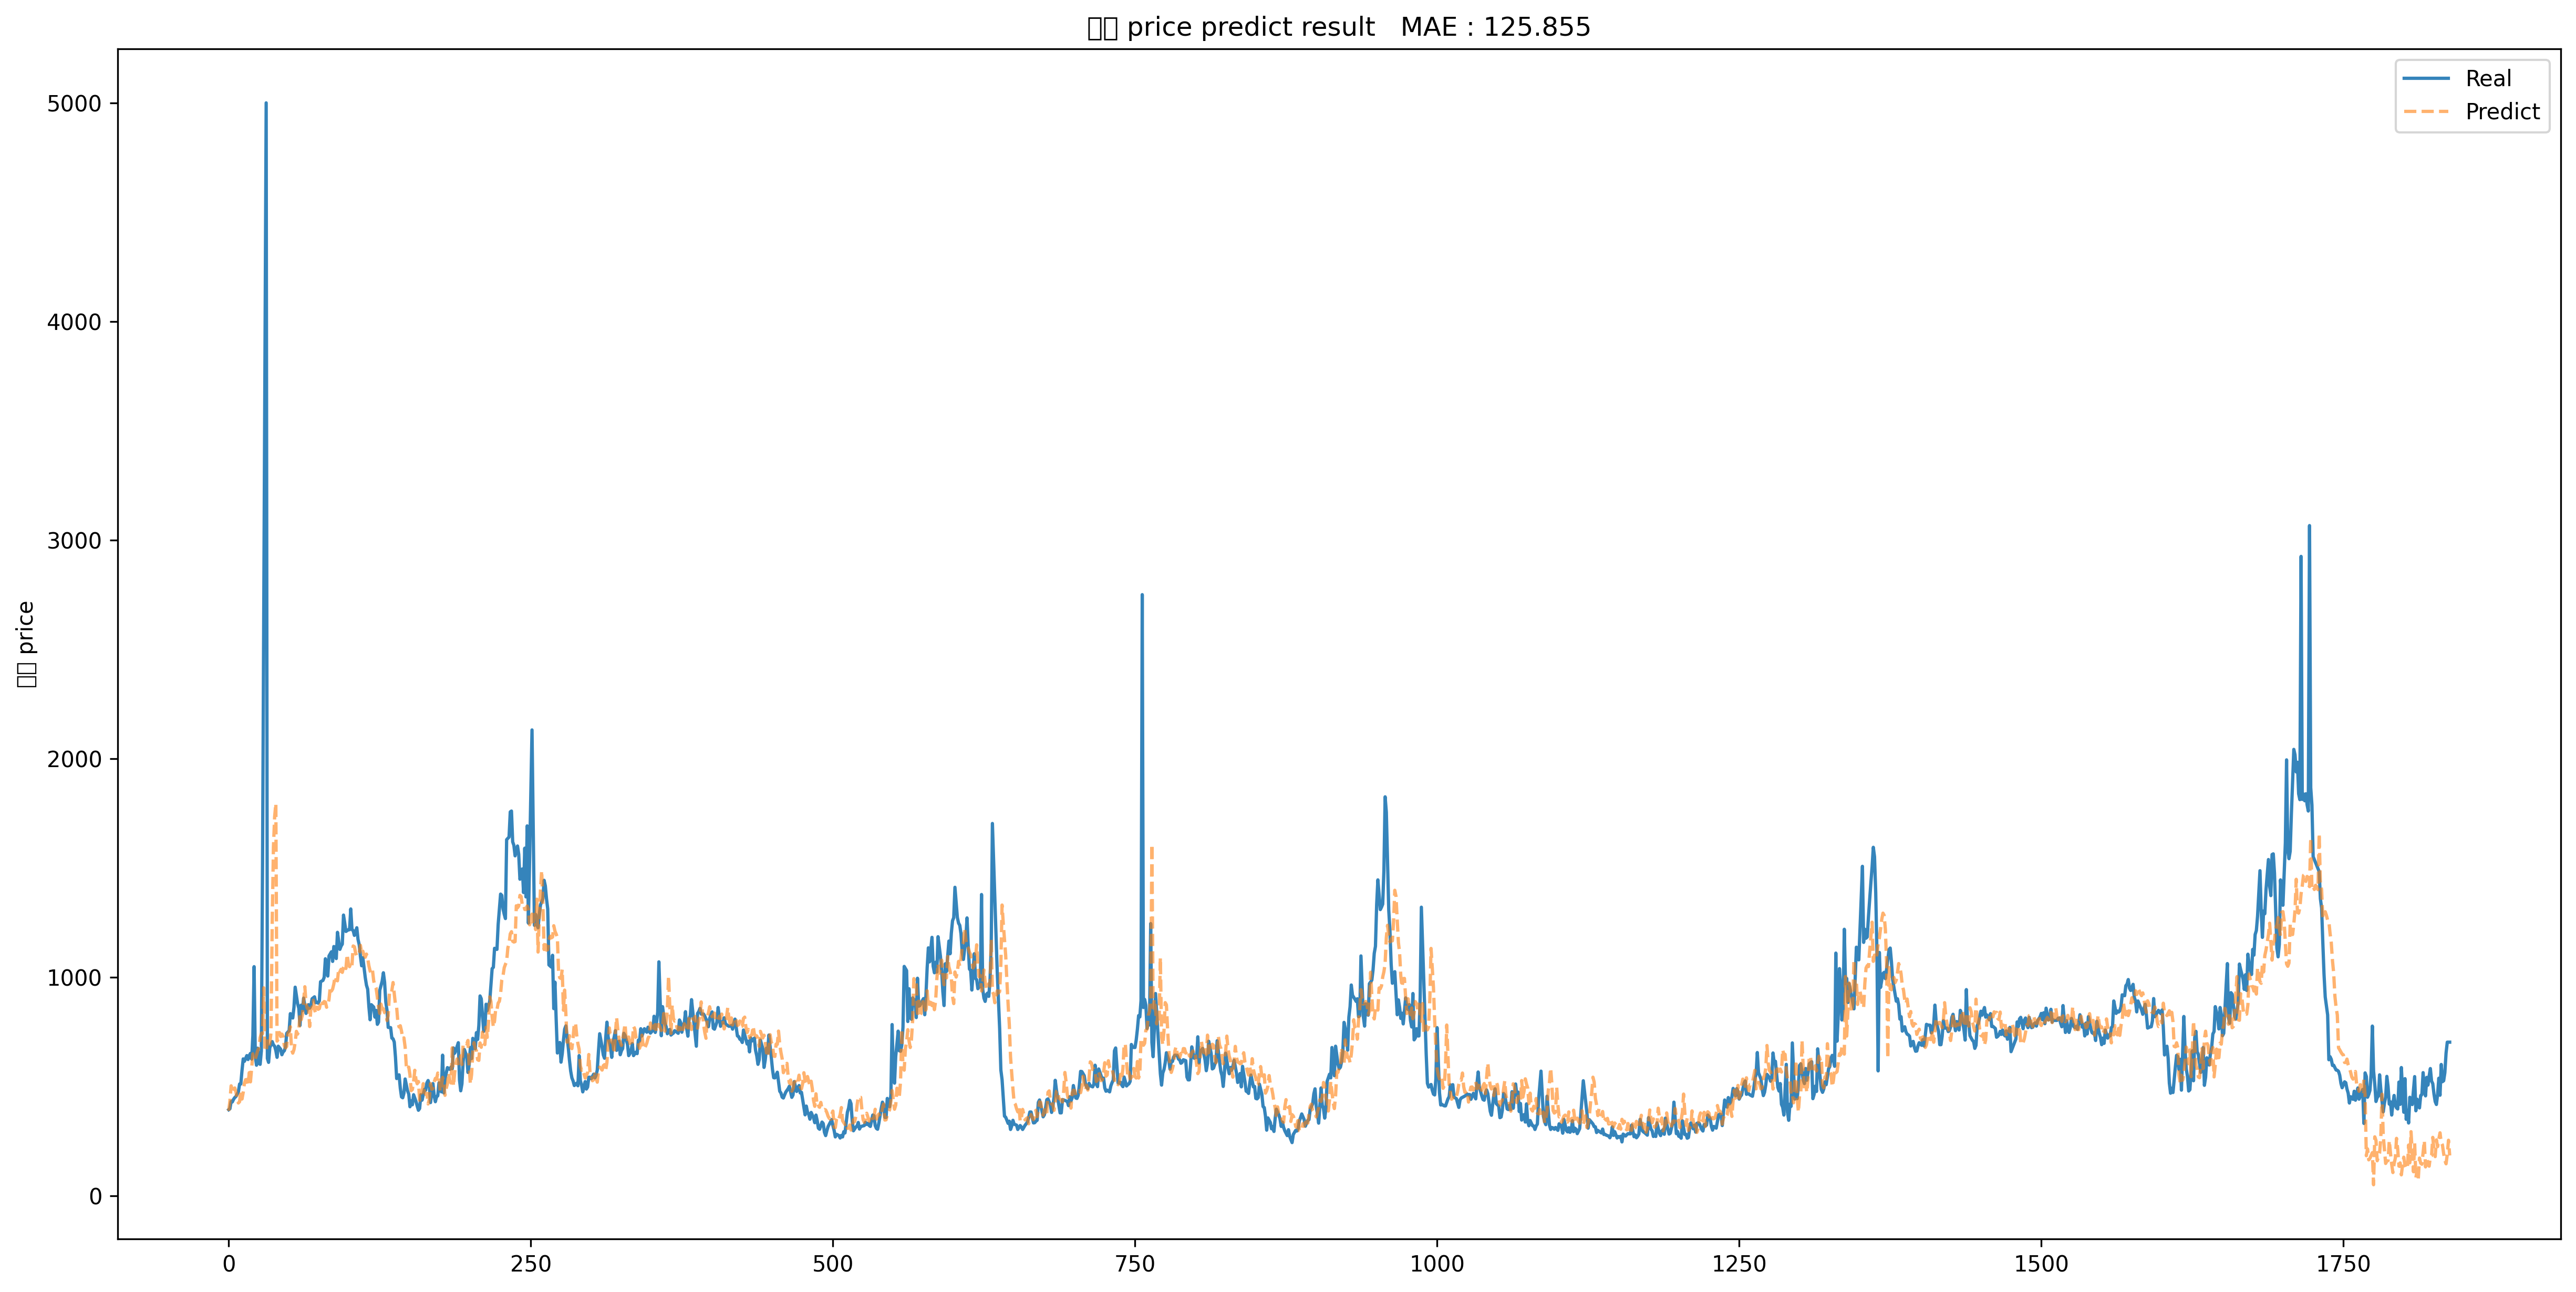

In [34]:
my_nong1 = Nong1(df1, df2)
my_nong1.set_feature('배추')
my_nong1.set_target(1)
my_nong1.set_model()
my_nong1.get_plot()

In [12]:
weeks = [1,2,4]
features = ['배추', '무', '양파', '건고추', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치', '미나리', '당근', '파프리카', '새송이', '팽이버섯', 
            '토마토', '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇']

week1=[]
week2=[]
week4=[]

for week in weeks:
  print(week)
  for feature in features:
    my_nong1 = Nong1(df1, df2)
    my_nong1.set_feature(feature)
    my_nong1.set_target(week)
    my_nong1.set_model()
    if week == 1:
      week1.append(my_nong1.get_price())
    if week == 2:
      week2.append(my_nong1.get_price())
    if week == 4:
      week4.append(my_nong1.get_price())
    print(feature)

1
배추
무
양파
건고추
마늘
대파
얼갈이배추
양배추
깻잎
시금치
미나리
당근
파프리카
새송이
팽이버섯
토마토
청상추
백다다기
애호박
캠벨얼리
샤인마스캇
2
배추
무
양파
건고추
마늘
대파
얼갈이배추
양배추
깻잎
시금치
미나리
당근
파프리카
새송이
팽이버섯
토마토
청상추
백다다기
애호박
캠벨얼리
샤인마스캇
4
배추
무
양파
건고추
마늘
대파
얼갈이배추
양배추
깻잎
시금치
미나리
당근
파프리카
새송이
팽이버섯
토마토
청상추
백다다기
애호박
캠벨얼리
샤인마스캇


In [14]:
df1 = pd.concat([df1, df2], axis=0)
df1.to_csv('/content/drive/MyDrive/Colab Notebooks/종합설계과제/df1.csv', encoding='utf-8-sig', index=False)

In [17]:
df1

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.00,329.000000,80272.0,360.000000,122787.5,1281.000000,3.0,11000.000000,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.50,478.000000,1699653.7,382.000000,2315079.0,1235.000000,699.0,4464.000000,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.00,442.000000,1423482.3,422.000000,2092960.1,1213.000000,1112.6,4342.000000,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,2021-01-29,NaN,1035047.80,525.872471,1306054.1,416.046110,1272019.2,1493.643547,6666.2,16771.622364,...,33519.5,4535.0,182826.0,3408.0,231611.0,3987.0,0.0,0.0,36389.1,12758.0
1843,2021-01-30,NaN,414903.10,563.165341,1092099.6,434.563244,774205.9,1550.696540,683.8,18792.921907,...,34886.0,4220.0,180419.0,3398.0,165275.0,3995.0,20.0,3850.0,26387.3,12817.0
1844,2021-01-31,NaN,1808.00,652.820796,2682.0,448.098434,0.0,0.000000,0.0,0.000000,...,216.0,4475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2022-06-10 00:00:00,금요일,1096334.38,702.475323,1307435.5,553.161995,2741957.0,973.381333,302.0,12890.728477,...,45266.0,2881.0,877490.8,1579.0,336676.5,1940.0,1308.0,14091.0,290.0,25159.0


In [19]:
week1

[714.81256,
 463.4993,
 1058.3523,
 11144.206,
 5324.0386,
 2072.9473,
 1089.463,
 482.5718,
 5738.4663,
 2913.4822,
 2669.364,
 1124.527,
 2999.4136,
 2666.6526,
 2297.45,
 2019.3586,
 3902.8665,
 1827.3495,
 2336.7622,
 4707.619,
 22872.152]

In [26]:
predict = pd.DataFrame(columns={'예측대상일자'})
feature = ['배추_가격(원/kg)',	'무_가격(원/kg)',	'양파_가격(원/kg)',	'건고추_가격(원/kg)',	'마늘_가격(원/kg)',	'대파_가격(원/kg)',	'얼갈이배추_가격(원/kg)',
           '양배추_가격(원/kg)'	,'깻잎_가격(원/kg)',	'시금치_가격(원/kg)',	'미나리_가격(원/kg)',	'당근_가격(원/kg)',	'파프리카_가격(원/kg)',	'새송이_가격(원/kg)',	'팽이버섯_가격(원/kg)',	
           '토마토_가격(원/kg)',	'청상추_가격(원/kg)',	'백다다기_가격(원/kg)',	'애호박_가격(원/kg)',	'캠벨얼리_가격(원/kg)',	'샤인마스캇_가격(원/kg)']
predict = predict.set_index('예측대상일자')
predict.loc[datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")+'+1week', feature] = week1
predict.loc[datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")+'+2week', feature] = week2
predict.loc[datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")+'+4week', feature] = week4
predict.reset_index(drop=False, inplace=True)
path = '/content/drive/MyDrive/Colab Notebooks/종합설계과제/'
title = 'predict' + date + '.csv'

In [27]:
predict

,예측대상일자,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,2022-06-10+1week,714.812561,463.499298,1058.352295,11144.206055,5324.038574,2072.947266,1089.463013,482.571808,5738.466309,...,1124.526978,2999.413574,2666.652588,2297.449951,2019.358643,3902.866455,1827.349487,2336.762207,4707.619141,22872.152344
1,2022-06-10+2week,740.837158,488.442291,992.333801,11232.855469,5316.869141,1897.094360,1121.591431,532.913635,5583.695801,...,1089.595947,2719.904785,2241.890869,1868.448608,2115.928955,3581.400879,1441.992798,2039.994751,4646.188965,22541.988281
2,2022-06-10+4week,718.036438,555.717529,922.476990,11457.357422,5400.820312,1557.873169,1085.975220,533.412476,5237.151367,...,1096.295776,3155.350098,2222.843262,1593.413818,1499.135254,3330.084961,1518.260376,1738.159302,5470.983887,19861.941406


In [28]:
df2

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2022-06-10,금요일,1096334.38,702.475323,1307435.5,553.161995,2741957.0,973.381333,302.0,12890.728477,...,45266.0,2881,877490.8,1579,336676.5,1940,1308.0,14091,290.0,25159


In [30]:
df2.to_csv(path+"20220610.csv", encoding='utf-8-sig', index=False)

In [29]:
predict.to_csv(path+title, encoding='utf-8-sig', index=False)